# Regression a noyaux

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.rcParams.update({
    'font.size': 25,
    'figure.figsize': (25, 5)
})

In [21]:
# Le contenu de cette cellule est inconnue en pratique
size = 1000

x = np.linspace(start=0, stop=3, num=size)
y = np.square(x) + np.random.normal(size=len(x))*0.6
y = np.where(y>0, y, 0)

## Analyse de la base de donnée

On plot $x$ et $y$

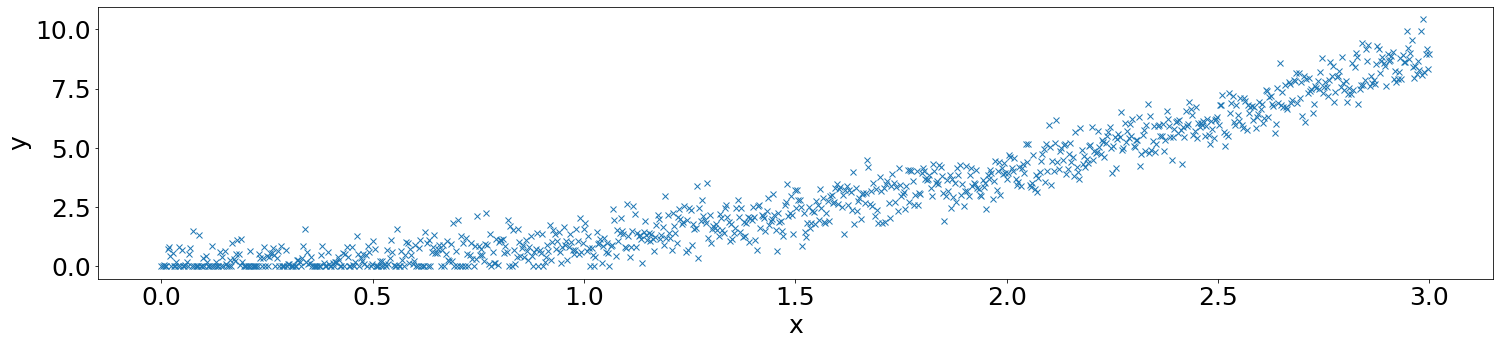

In [22]:
plt.plot(x, y, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Regression linéaire
C'est la méthode naive, on applique simplement une regression linéire sur nos données.

In [13]:
def fit_regression(X, y):
    # Reshape input for sklearn
    if len(X.shape) < 2:
        X = x.reshape(-1, 1)
    
    # Fit regression
    model = LinearRegression()
    reg = model.fit(X, y)
    
    # Compute score
    print(f"Regression score: {reg.score(X, y)}")
    
    # Plot real data
    plt.plot(x, y, 'x', label='data')
    # Plot regression line
    plt.plot(x, reg.predict(X), lw=5, label='regression')
    
    return reg

Regression score: 0.9230283617512691


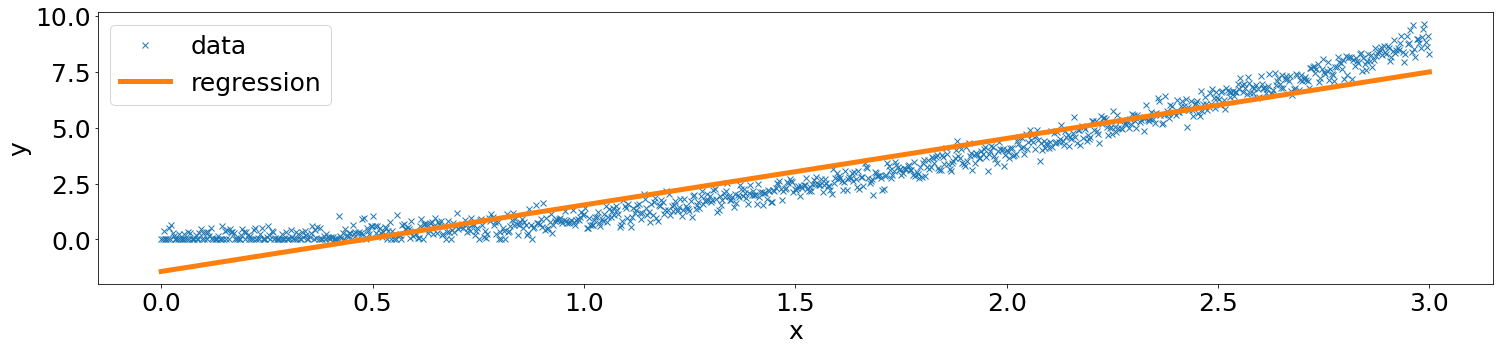

y = 2.98 * x + -1.43


In [14]:
reg = fit_regression(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(f"y = {reg.coef_.round(2).item()} * x + {reg.intercept_.round(2).item()}")

Comme on s'y attendais, ça ne donne rien !

## Méthode 1: Modifier les données
On va appliquer une fonction **non linéaire** aux données, pour les rendres plus facilement interprétable. On applique par exemple une fonction racine carré $z = \sqrt y$.

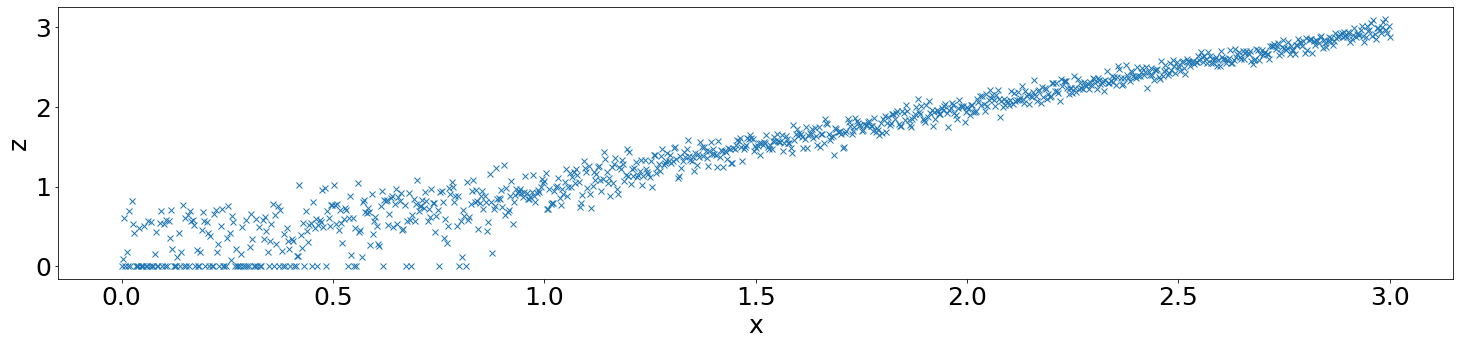

In [15]:
z = np.sqrt(y)

plt.plot(x, z, 'x')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

Puis on relance notre regression lineaire, avec $z$

Regression score: 0.95927240326287


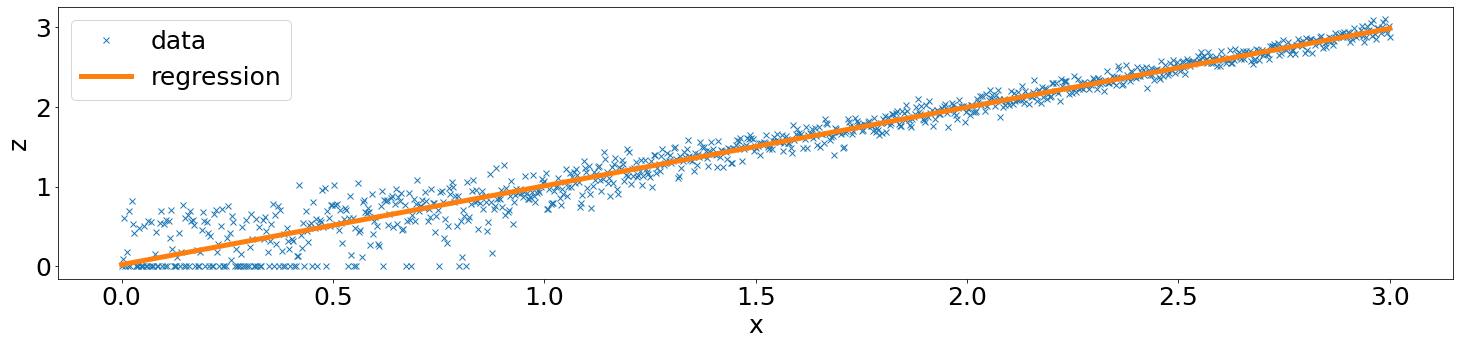

In [16]:
reg = fit_regression(x, z)
plt.xlabel('x')
plt.ylabel('z')
plt.legend()
plt.show()

On applique maintenant la fonction de **transformation inverse** sur notre regression

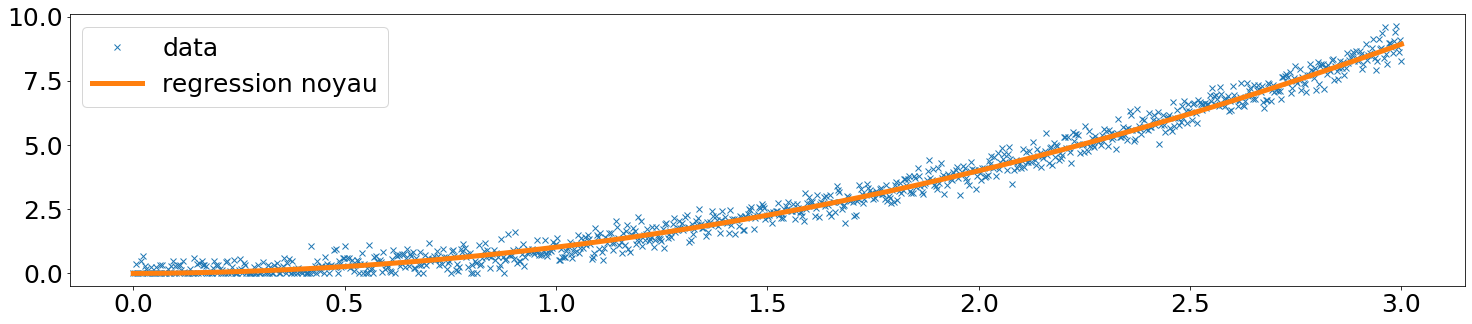

In [17]:
plt.plot(x, y, 'x', label='data')
plt.plot(x, np.square(reg.predict(x.reshape(-1, 1))), lw=5, label='regression noyau')
plt.legend()
plt.show()

## Méthode 2: Développer les variables d'entrée

Regression score: 0.9878257214354619


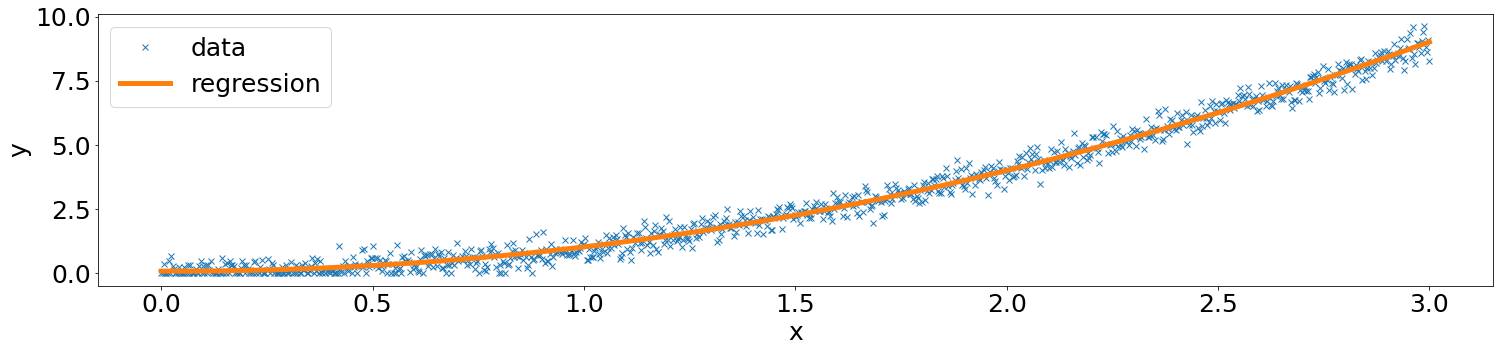

Les coefficients de regression sont [-0.07480353  1.01676634]


In [18]:
X = np.stack([
    x,
    x*x,
]).T

reg = fit_regression(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(f"Les coefficients de regression sont {reg.coef_}")

### En bonus, la méthode à l'arache

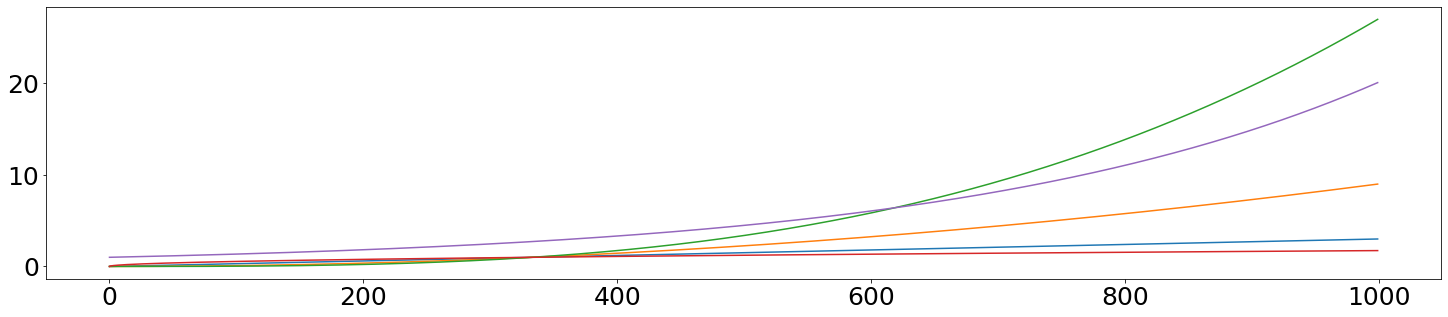

In [19]:
X = np.stack([
    x,
    x*x,
    x*x*x,
    np.sqrt(x),
    np.exp(x)
]).T

plt.plot(X)
plt.show()

Regression score: 0.9879532118716153


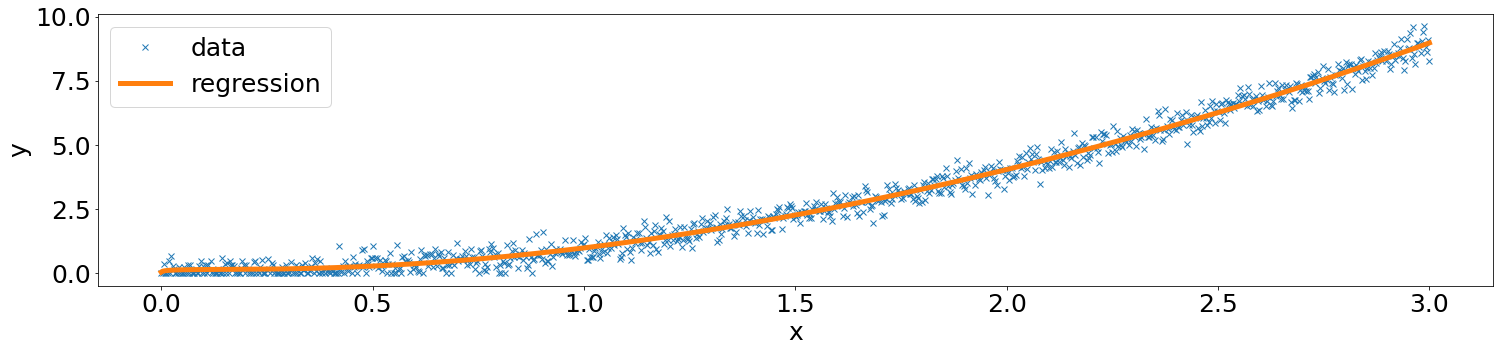

Les coefficients de regression sont [-1.56541954  1.74233036 -0.25390404  0.69646513  0.18814888]


In [20]:
reg = fit_regression(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(f"Les coefficients de regression sont {reg.coef_}")